## Imports

In [1]:
import numpy as np
import gzip

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

### Extract data by number

In [2]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype = np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype = np.uint8).astype(np.int64)
    return labels

In [14]:
def get_data(num_train_images,num_test_images):
    image1 = extract_data('train-images-idx3-ubyte.gz', num_train_images, 28)
    image2 = extract_data('t10k-images-idx3-ubyte.gz',num_test_images, 28)
    
    label1 = extract_labels('train-labels-idx1-ubyte.gz',num_train_images)
    label2 = extract_labels('t10k-labels-idx1-ubyte.gz',num_test_images)
    
    (X_train, y_train), (X_test, y_test) = (image1/255,label1),(image2/255,label2)
    return (X_train, y_train), (X_test, y_test)

In [16]:
y_test[50]

6

In [5]:
(X_train, y_train), (X_test, y_test) = get_data(5000,1000)
## Print off the shape of these arrays to see what we are dealing with
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(5000,)
(1000,)
(5000, 784)
(1000, 784)


### Plot the data

Label:  1


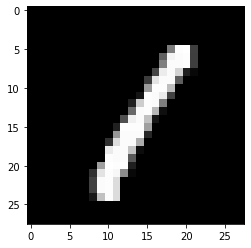

In [6]:
image_index = 3

print("Label: ", y_train[image_index])
reshaped_image = X_train[image_index].reshape((28, 28))

plt.imshow(reshaped_image, cmap='gray')
plt.show()

### Training the Model RFC

In [7]:
def train_model(X_train, y_train):
    Rclf = RandomForestClassifier(random_state=42, n_estimators =20)
    return Rclf.fit(X_train, y_train)

In [8]:
clf = train_model(X_train, y_train)

### Testing the model

In [9]:
def calculate_accuracy(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [10]:
print(calculate_accuracy(clf,X_test,y_test))

0.891


### Classification reports

In [11]:
def get_class_report(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    return classification_report(y_test, y_pred)

In [12]:
print(get_class_report(clf,X_test,y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.98      0.98      0.98       126
           2       0.88      0.90      0.89       116
           3       0.84      0.83      0.84       107
           4       0.86      0.90      0.88       110
           5       0.86      0.85      0.86        87
           6       0.91      0.93      0.92        87
           7       0.88      0.85      0.87        99
           8       0.93      0.78      0.85        89
           9       0.81      0.88      0.85        94

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



### Plot the results

Predicted Label:  5


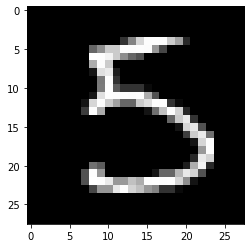

In [13]:
preds = clf.predict(X_test)

image_index = 15 ## Change me to see other predictions

print("Predicted Label: ",preds[image_index])
plt.imshow(X_test[image_index].reshape((28, 28)), cmap='gray')
plt.show()